# TP3 Projeto de Bloco: Inteligência Artificial e Machine Learning [24E3_5]
# Alberto F. Pluecker - 21.10.2024
https://colab.research.google.com/drive/1uPuMo0L-RjBuErTqVH9P2KubLrJQKWiB?usp=sharing

In [2]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

features = data.drop(columns=['Outcome'])  # 'Outcome' é a coluna de target
target = data['Outcome']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

## 2. Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.

In [5]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(features_train_pca, target_train)

predictions = model_decision_tree.predict(features_test_pca)

accuracy = model_decision_tree.score(features_test_pca, target_test)
print(f'Acurácia do modelo de árvore de decisão: {accuracy}')

Acurácia do modelo de árvore de decisão: 0.6493506493506493


## 3. Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model_decision_tree, features_train_pca, target_train, cv=5)
print(f'Scores da Validação Cruzada: {cross_val_scores}')
print(f'Média dos Scores: {cross_val_scores.mean()}')

Scores da Validação Cruzada: [0.7037037  0.67592593 0.68224299 0.6728972  0.69158879]
Média dos Scores: 0.6852717203184493


## 4. Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 10, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(features_train_pca, target_train)

print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_split': 20}


## 5. Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.

In [8]:
pruned_tree_model = DecisionTreeClassifier(random_state=42, max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
pruned_tree_model.fit(features_train_pca, target_train)

accuracy_pruned = pruned_tree_model.score(features_test_pca, target_test)
print(f'Acurácia do modelo com poda: {accuracy_pruned}')

Acurácia do modelo com poda: 0.696969696969697


## 6. Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

Precisão: 0.5595238095238095
Recall: 0.5875
F1-Score: 0.573170731707317
Sensibilidade (Recall): 0.5875
Especificidade: 0.7549668874172185
AUC: 0.6988824503311258


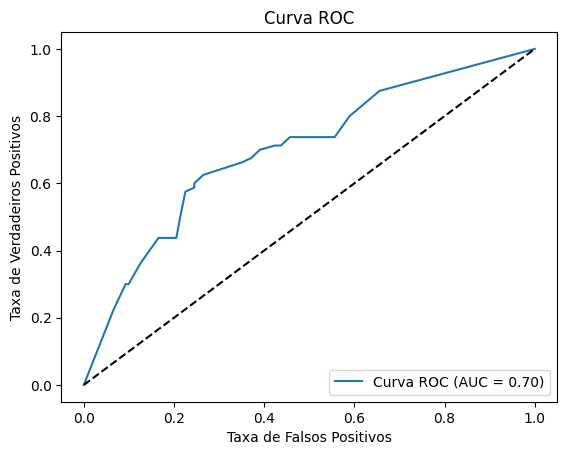

In [9]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report

predictions = pruned_tree_model.predict(features_test_pca)

precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)

fpr, tpr, _ = roc_curve(target_test, pruned_tree_model.predict_proba(features_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

conf_matrix = confusion_matrix(target_test, predictions)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Sensibilidade (Recall): {recall}')
print(f'Especificidade: {specificity}')
print(f'AUC: {roc_auc}')

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## 7. Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

- **Precisão (0.56)**: O modelo acerta 56% das vezes quando prevê positivo, mas comete muitos falsos positivos.
- **Recall (0.59)**: Capta 59% dos casos positivos, mas ainda deixa passar muitos.
- **F1-Score (0.57)**: Desempenho mediano, balanceando os erros de falsos positivos e negativos.
- **Especificidade (0.75)**: Bom para prever negativos, mas o recall ainda é menor.
- **AUC (0.70)**: O modelo separa bem as classes, mas poderia ser mais preciso.

O classificador tem um desempenho razoável. Ele distingue bem as classes, mas ainda comete muitos erros, principalmente com falsos positivos e negativos. Tem espaço para melhorias, mas já está "ok" para alguns cenários.